<a href="https://colab.research.google.com/github/oshvil2020/Unsupervised-ML/blob/main/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall-customers

## import libereies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import MeanShift, KMeans
from sklearn.metrics.cluster import completeness_score,homogeneity_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.rename(columns={'Genre':'Gender', 'Annual Income (k$)':'Income','Spending Score (1-100)':'SpendingScore'}, inplace=True)

In [3]:
df.drop(columns=['CustomerID'],inplace=True)

## Data description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         200 non-null    object
 1   Age            200 non-null    int64 
 2   Income         200 non-null    int64 
 3   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe()

,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

In [7]:
df.shape

(200, 4)

# Data Visualizations


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


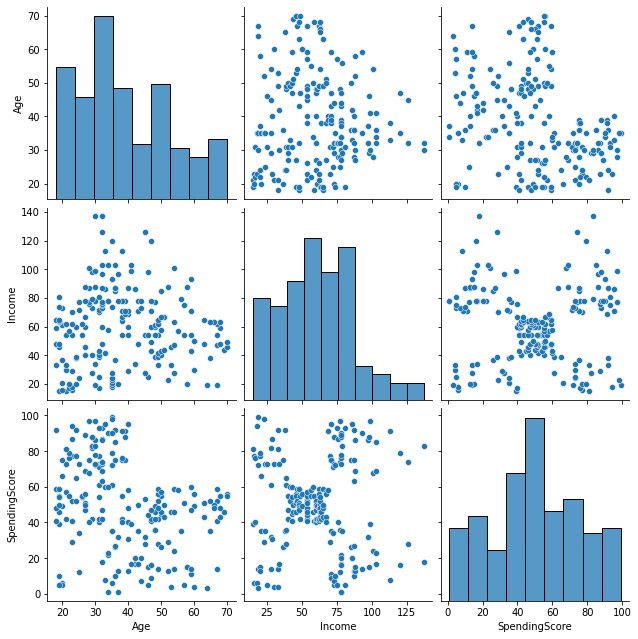

In [8]:
sns.pairplot(df, size=3, diag_kind="hist")
# .set_title('Pairplot for the Data', fontsize = 20)
plt.grid(False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

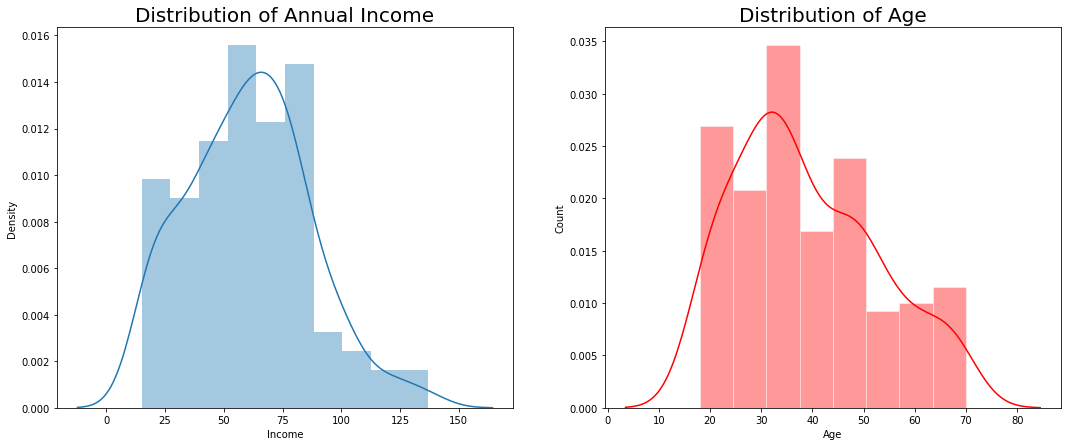

In [9]:
fig, ax = plt.subplots(nrows = 1 , ncols=2, figsize = (18,7))

sns.distplot(df['Income'], ax= ax[0])

sns.set(style = 'whitegrid')
ax[0].set_title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Count')


sns.distplot(df['Age'], color = 'red', ax= ax[1])
sns.set(style = 'whitegrid')
ax[1].set_title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')


In [10]:
df

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


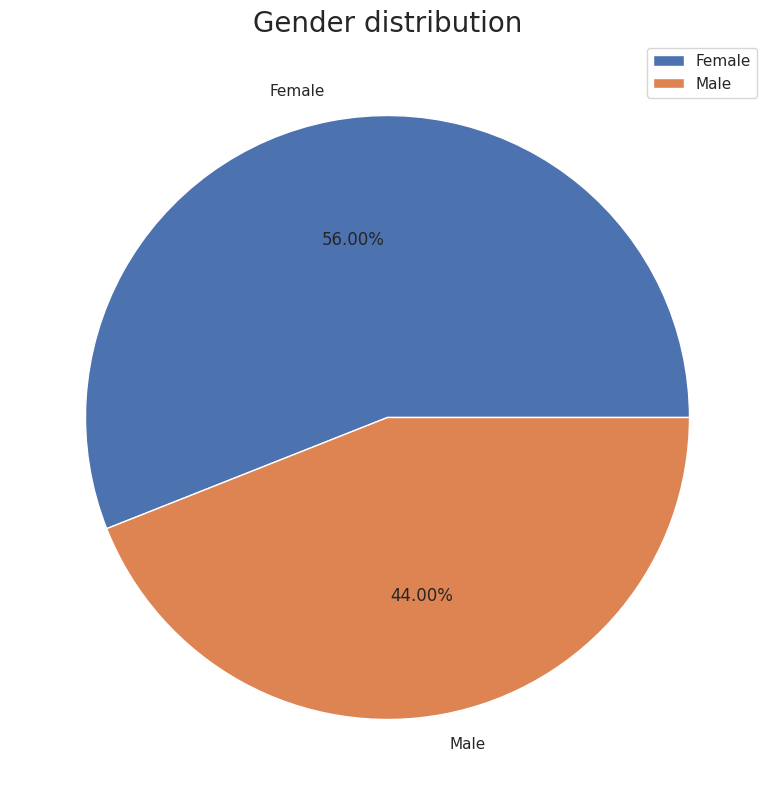

In [11]:
from IPython.core.pylabtools import figsize
labels = ['Female', 'Male']
size = df['Gender'].value_counts()

fig, ax = plt.subplots(nrows=1,ncols=1, figsize= (10,10), dpi=100)
plt.pie(size, labels = labels, autopct = '%.2f%%')
plt.title('Gender distribution', fontsize = 20)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Age')

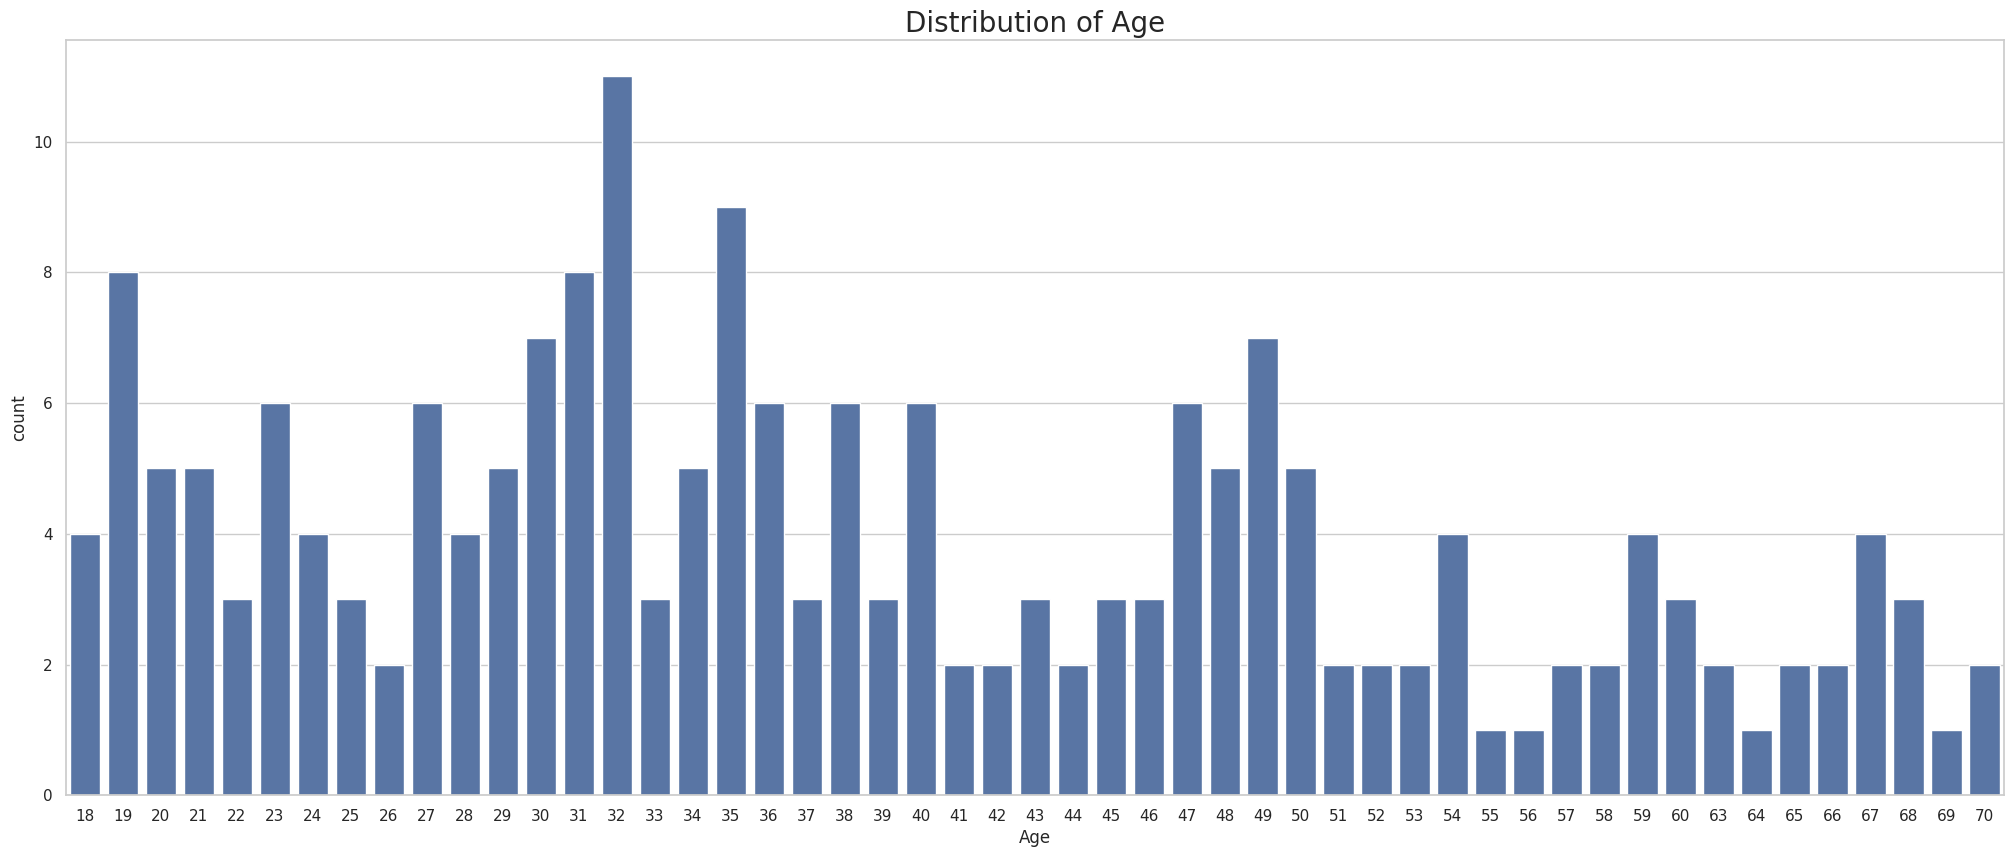

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize= (25,10), dpi=100)

sns.countplot(df['Age'], color="b")
plt.title('Distribution of Age', fontsize = 20)

Text(0.5, 1.0, 'Correlation Map')

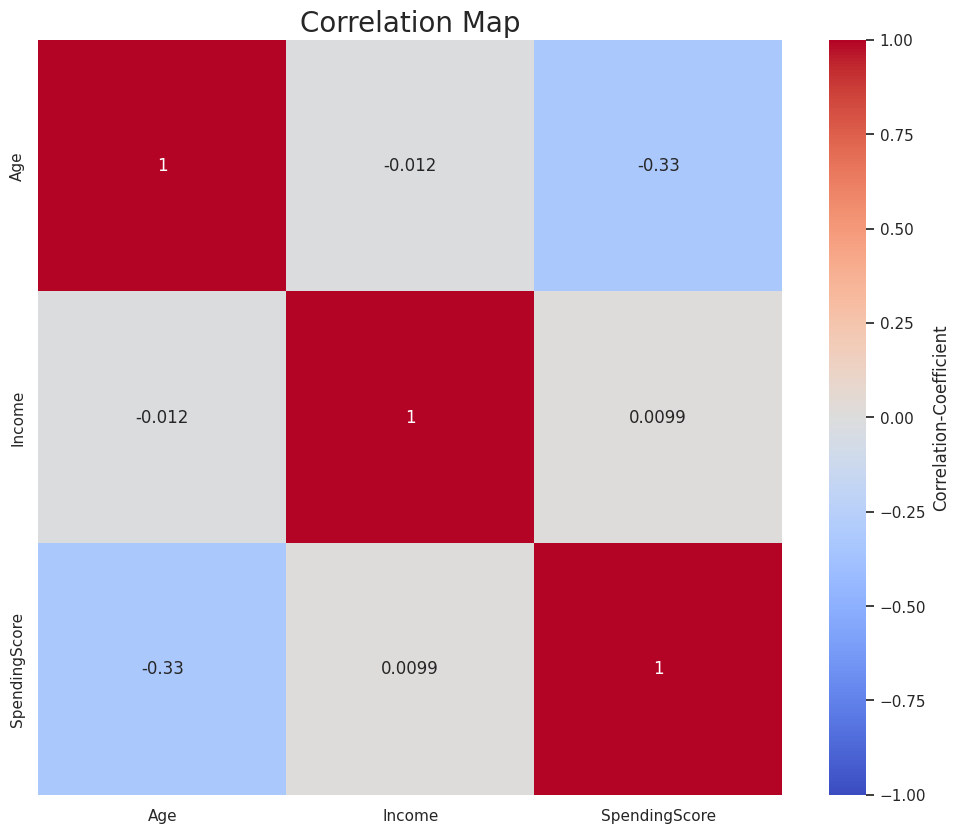

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize= (12,10), dpi=100)
ax =sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm', vmin= -1, vmax=+1, cbar_kws={'label':'Correlation-Coefficient'})
plt.title('Correlation Map', fontsize = 20)


# Clustering







In [14]:
from sklearn import feature_selection
from sklearn.cluster import KMeans, MeanShift

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['Gender'] = le.fit_transform(df.Gender)

In [17]:
df

,Gender,Age,Income,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [18]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [30]:
vt.fit_transform(df);

In [20]:
vt.variances_

array([2.464000e-01, 1.941575e+02, 6.863864e+02, 6.635200e+02])

## Partitioning Method

### Elbow

In [21]:
X = df.iloc[:,[1,2,3]].values

In [22]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

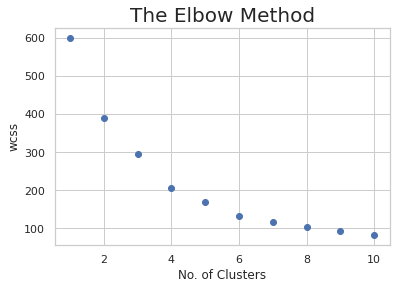

In [23]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.scatter(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

### KMean

In [24]:
df_clus = df.iloc[:,[1,2,3]]
kmeans3d = KMeans(n_clusters=5, random_state = 0).fit_predict(df_clus.values)
df_clus['km_cluster_id3d']=kmeans3d


In [25]:
df_clus2 = df.iloc[:,[2,3]]
kmeans2d = KMeans(n_clusters=5, random_state = 0).fit_predict(df_clus2.values)
df_clus['km_cluster_id2d']=kmeans2d

In [26]:
df_clus

,Age,Income,SpendingScore,km_cluster_id3d,km_cluster_id2d
0,19,15,39,0,4
1,21,15,81,4,3
2,20,16,6,0,4
3,23,16,77,4,3
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,1,2
196,45,126,28,3,0
197,32,126,74,1,2
198,32,137,18,3,0


In [27]:
comp_km = completeness_score( labels_true=df_clus['km_cluster_id3d'],labels_pred=df_clus['km_cluster_id2d'])
hemo_km = homogeneity_score(df_clus['km_cluster_id3d'], df_clus['km_cluster_id2d'])
print("completeness_score: ", comp_km)
print("homogeneity_score : ",hemo_km)

completeness_score:  0.9706932634714003
homogeneity_score :  0.9639226255236567


In [28]:
data = [ comp_km , hemo_km]
result = pd.DataFrame([data], columns=["completeness_score","homogeneity_score "], index=["kmeans"])
result

,completeness_score,homogeneity_score
kmeans,0.970693,0.963923


#### Plot


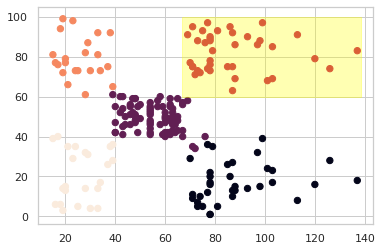

In [29]:
plt.scatter(df_clus.values[:,1],df_clus.values[:,2], s= 40 , c= df_clus['km_cluster_id2d'])
plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

# Nouvelle section

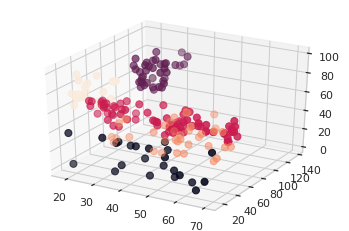

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df_clus.values[:,0],df_clus.values[:,1],df_clus.values[:,2] , s = 50, c = kmeans3d, label = 'Cluster 1')

In [32]:
import plotly.express as px

fig = px.scatter_3d(df_clus, df_clus.values[:,0],df_clus.values[:,1],df_clus.values[:,2],color=kmeans3d, color_discrete_map=True )
fig.show()

### MeanShift

Mean shift clustering involves finding and adapting centroids based on the density of examples in the feature space.

In [33]:
from sklearn.cluster import MeanShift

In [34]:
df_clus = df.iloc[:,[1,2,3]]
yms3d = MeanShift(bandwidth=25).fit_predict(df_clus.values)
df_clus['ms_cluster_id3d']=yms3d


In [35]:
df_clus2 = df.iloc[:,[2,3]]
yms2d = MeanShift(bandwidth=25).fit_predict(df_clus2.values)
df_clus['ms_cluster_id2d']=yms2d

In [36]:
comp_ms = completeness_score( labels_true=df_clus['ms_cluster_id3d'],labels_pred=df_clus['ms_cluster_id2d'])
hemo_ms = homogeneity_score(df_clus['ms_cluster_id3d'], df_clus['ms_cluster_id2d'])

In [37]:
data_ms = [comp_ms , hemo_ms]
print("completeness_score: ",comp_ms)
print("homogeneity_score : ",hemo_ms)



completeness_score:  0.9549903395570143
homogeneity_score :  0.9558063307862774


In [38]:
result.loc['meanhift']=data_ms
result

,completeness_score,homogeneity_score
kmeans,0.970693,0.963923
meanhift,0.954990,0.955806


#### plot

In [39]:
import plotly.express as px

fig = px.scatter_3d(df_clus, x=df_clus.values[:,0],y=df_clus.values[:,1],z=df_clus.values[:,2],color=yms3d)
fig.show()

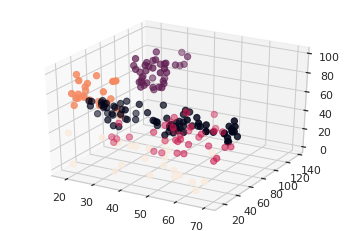

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_clus.values[:,0],df_clus.values[:,1],df_clus.values[:,2],s=40, c=yms3d)
fig.show()

## Hierarchial Clustering


### Agglomerative method


Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

In [59]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
# df_clus = df.iloc[:,[1,2,3]]
# df_agc = StandardScaler().fit_transform(df_clus)
# agc3d =  AgglomerativeClustering(linkage='single',compute_full_tree=True,n_clusters=5).fit_predict(df_agc)
# df_clus['ag_cluster_id3d']=agc3d


In [61]:
df_clus = df.iloc[:,[1,2,3]]
df_agc = StandardScaler().fit_transform(df_clus)
agc3d =  AgglomerativeClustering(affinity='euclidean', linkage='ward',compute_full_tree=True,n_clusters=5).fit_predict(df_agc)
df_clus['ag_cluster_id3d']=agc3d


In [62]:
df_clus2 = df.iloc[:,[2,3]]
df_agc2 = StandardScaler().fit_transform(df_clus2)
agc2d =  AgglomerativeClustering(affinity='euclidean', linkage='ward',compute_full_tree=True,n_clusters=5).fit_predict(df_agc2)
df_clus['ag_cluster_id2d']=agc2d

In [63]:
comp_agc = completeness_score( labels_true=df_clus['ag_cluster_id3d'],labels_pred=df_clus['ag_cluster_id2d'])
hemo_agc = homogeneity_score(df_clus['ag_cluster_id3d'], df_clus['ag_cluster_id2d'])
print("completeness_score: ",comp_agc)
print("homogeneity_score : ",hemo_agc)

completeness_score:  0.7961150037861353
homogeneity_score :  0.7561141097328026


In [64]:
data_agc = [comp_agc , hemo_agc]
print("completeness_score: ",comp_agc)
print("homogeneity_score : ",hemo_agc)

result.loc['agc'] = data_agc
result

completeness_score:  0.7961150037861353
homogeneity_score :  0.7561141097328026


,completeness_score,homogeneity_score
kmeans,0.970693,0.963923
meanhift,0.954990,0.955806
agc,0.796115,0.756114
DB Scan,1.000000,1.000000


#### plot

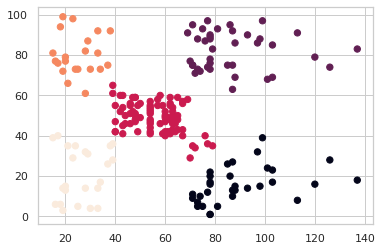

In [65]:
plt.scatter(df_clus.values[:,1] , df_clus.values[:,2],s=40,c=agc2d)

## Density Based Clustering 


### DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

For this data, could not get a good result.

In [48]:
from sklearn.cluster import DBSCAN
import numpy as np


In [49]:
# ### model = DBSCAN(eps=0.7, min_samples=90)

In [50]:
df_clus = df.iloc[:,[1,2,3]]
df_dbscan = StandardScaler().fit_transform(df_clus)
dbscan3d = DBSCAN(eps=0.7, min_samples= 16).fit(df_dbscan)
core_samples_mask3d = np.zeros_like(dbscan3d.labels_, dtype=bool)
core_samples_mask3d[dbscan3d.core_sample_indices_] = True
labels = dbscan3d.labels_
df_clus['dbscan_cluster_id3d']=labels



In [51]:
df_clus2 = df.iloc[:,[2,3]]
df_dbscan2 = StandardScaler().fit_transform(df_clus2)
dbscan2d =  DBSCAN(eps=0.7, min_samples= 16).fit(df_dbscan2)
core_samples_mask2d = np.zeros_like(dbscan2d.labels_, dtype=bool)
core_samples_mask2d[dbscan2d.core_sample_indices_] = True
# labels = db.labels_
df_clus['dbscan_cluster_id2d']=labels

In [52]:
comp_db = completeness_score( labels_true=df_clus['dbscan_cluster_id3d'],labels_pred=df_clus['dbscan_cluster_id2d'])
homo_db =homogeneity_score(df_clus['dbscan_cluster_id3d'], df_clus['dbscan_cluster_id2d'])
print("completeness_score: ",comp_db)
print("homogeneity_score : ",homo_db)

data_db = [comp_db, homo_db]

completeness_score:  1.0
homogeneity_score :  1.0


In [53]:
len(core_samples_mask3d)-sum(core_samples_mask3d)

140

In [54]:
result.loc['DB Scan'] = data_db
result

,completeness_score,homogeneity_score
kmeans,0.970693,0.963923
meanhift,0.954990,0.955806
agc,0.796115,0.756114
DB Scan,1.000000,1.000000


#### plot

In [55]:
labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0,  1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0,  1, -1,  1,  2,  1,  0,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2,  1,  1,  3,  2,  3,  1,  3, -1,  3, -1,  3,  2,  3, -1,  3,
       -1,  3, -1,  3, -1,  3,  2,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1,  3, -1,  3,  1,  3, -1,  3, -1,  3, -1,  3, -1,  3,
       -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
        3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

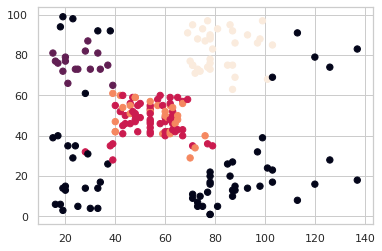

In [56]:
plt.scatter(df_clus.values[:,1], df_clus.values[:,2] ,s=40,c=labels)

# Result

In [57]:
result.rename(index={0:"kmean" , 1:"Mean Shif", 2 :"Agglomerative" , 3:"DB SCAN"})

,completeness_score,homogeneity_score
kmeans,0.970693,0.963923
meanhift,0.954990,0.955806
agc,0.796115,0.756114
DB Scan,1.000000,1.000000
